In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
data = pd.read_csv("C:/Users/JAAVANIKA L/fall semester 22-23/Downloads/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].mean(), inplace=True)

In [8]:
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])

In [11]:
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

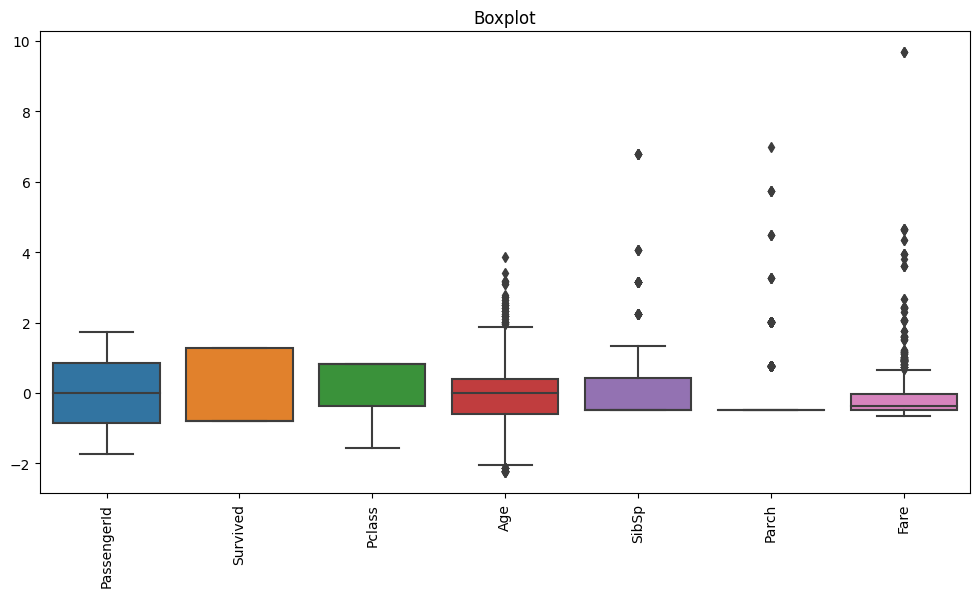

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.title("Boxplot")
plt.xticks(rotation=90)
plt.show()

In [15]:
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

In [16]:
print("\nShape of dataset after removing outliers:", data.shape)


Shape of dataset after removing outliers: (361, 12)
